<a href="https://colab.research.google.com/github/spandana1320/Data-mining/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

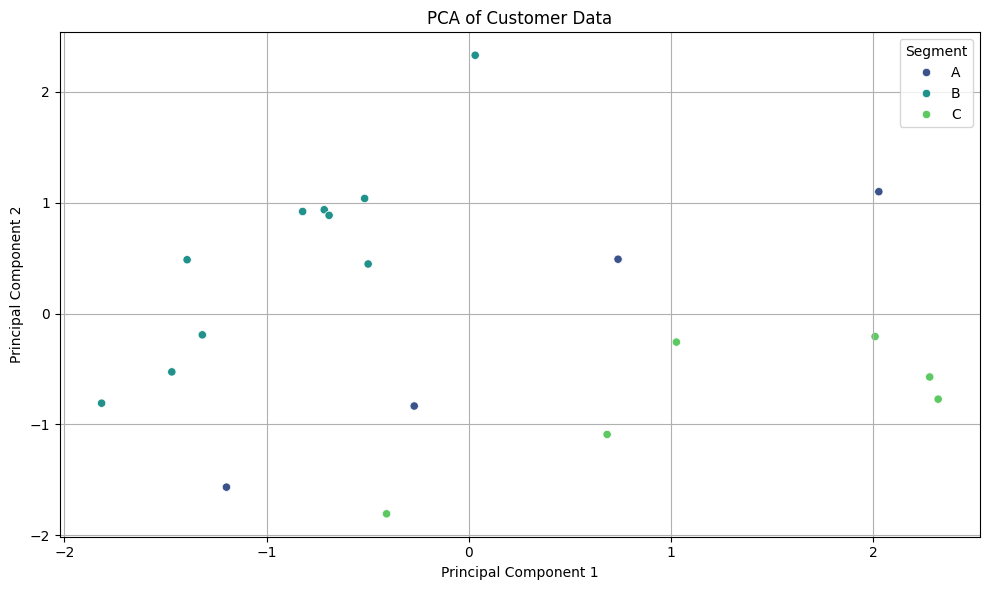

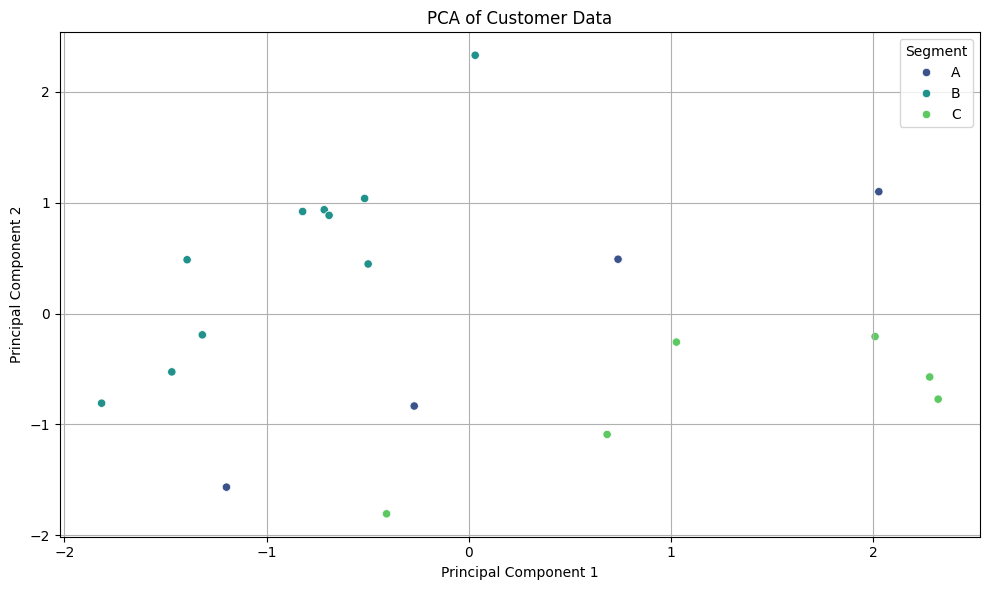

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/customer_data.csv')
features = ['Age', 'Annual Income', 'Spending Score']
x = df[features].dropna()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
if 'Customer Segmentation' in df.columns:
    pca_df['Segment'] = df['Customer Segmentation']
plt.figure(figsize=(10, 6))
if 'Segment' in pca_df.columns:
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Segment', palette='viridis')
else:
    sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title('PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
if 'Customer Segmentation' in df.columns:
    pca_df['Segment'] = df['Customer Segmentation']
plt.figure(figsize=(10, 6))
if 'Segment' in pca_df.columns:
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Segment', palette='viridis')
else:
    sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title('PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
!pip install reportlab
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image as RLImage
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4


df = pd.read_csv('customer_data.csv')


features = ['Age', 'Annual Income', 'Spending Score']
x = df[features].dropna()
x_scaled = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
components = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
if 'Customer Segmentation' in df.columns:
    pca_df['Segment'] = df.loc[x.index, 'Customer Segmentation']
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Segment', palette='viridis')
plt.title('PCA of Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plot_path = "pca_plot.png"
plt.savefig(plot_path)
plt.close()

doc = SimpleDocTemplate("PCA_Report.pdf", pagesize=A4)
styles = getSampleStyleSheet()
story = []

story.append(Paragraph("PCA Report - Customer Segmentation", styles['Title']))
story.append(Spacer(1, 12))

variance_text = f"Explained Variance by PC1 and PC2: {pca.explained_variance_ratio_[0]:.2f}, {pca.explained_variance_ratio_[1]:.2f}"
story.append(Paragraph(variance_text, styles['Normal']))
story.append(Spacer(1, 12))

story.append(RLImage(plot_path, width=400, height=300))
story.append(Spacer(1, 12))

doc.build(story)
print("PDF report saved as 'PCA_Report.pdf'")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.2 MB/s eta 0:00:00
PDF report saved as 'PCA_Report.pdf'


In [9]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/customer_segmentation.csv')

# Select numeric features for PCA
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
x = df[features]

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Optional: Add Customer Segmentation back for visualization
pca_df['Customer Segmentation'] = df['Customer Segmentation']

# Display the PCA DataFrame
print(pca_df.head())

        PC1       PC2 Customer Segmentation
0  1.298990 -1.346232                     B
1  1.951161 -0.832549                     B
2  0.245261  0.473682                     C
3 -1.386613 -0.128718                     C
4  0.331818 -0.007034                     B


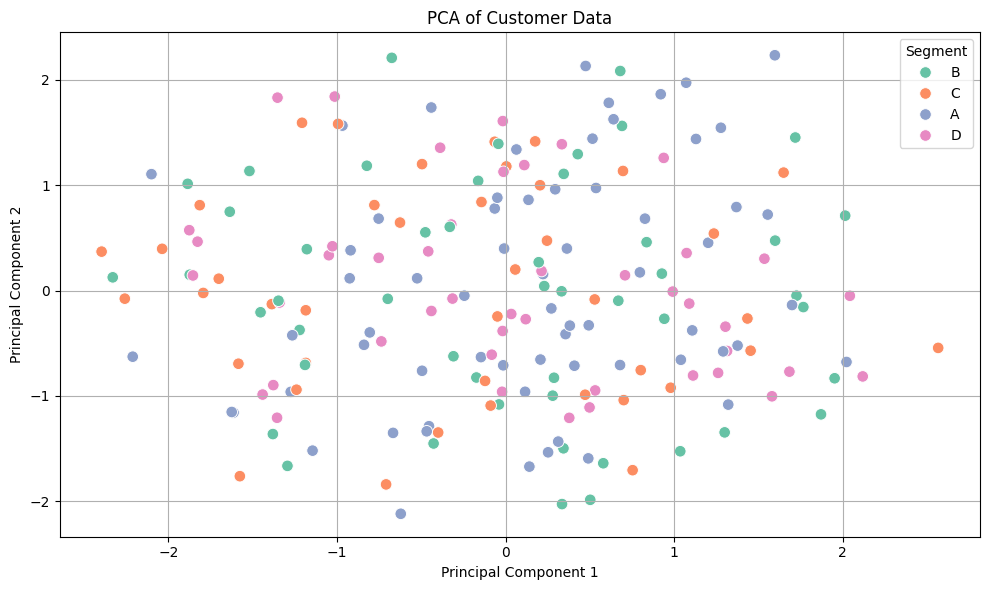

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('customer_segmentation.csv')

# Select numeric features for PCA
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
x = df[features]

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)

# Create DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Customer Segmentation'] = df['Customer Segmentation']

# Scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Customer Segmentation', palette='Set2', s=70)
plt.title('PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Segment')
plt.grid(True)
plt.tight_layout()
plt.show()